# Implementation of ConvNets


For the implementatoin of ConvNets, I decided to take two of my favorite monuments from India i.e. Taj Mahal and India Gate. 

There are many people in the world who don't know what all monuments are there in India and how they look like. My model will be able to process images of both Taj Mahal and India Gate and will be able to successfully predict which image shows Taj Mahal and which image shows India Gate.

This model will be useful for people who are travelling to India for the first time and want to look at the monuments present and would like to see similar photos of the monuments.

If a person is looking for Taj Mahal then our model will be successfully able to identify and classify all similar images of Taj Mahal monument in a single category of Taj Mahal images. Similarly our model will be able to classify all the images of India Gate in a single category of India Gate images.

I will be making use of 200 random images of Taj Mahal monument and 200 random images of India Gate monument taken from bing search and train my model on 50% of the data and will measure the accuracy of the model when random images are given to the model.

## Importing Libraries

In [ ]:
# Importing the libraries needed

from IPython.display import Image
import os
import shutil

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Installing the Bing Image Downloader

In [ ]:
# Installing the Bing Image Downloader

!pip install bing-image-downloader

from bing_image_downloader import downloader 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Creating a directory in the runtime for storing the images

In [ ]:
# Using mkdir to create a new directory

!mkdir images

## Using Bing Image Downloader to download images of Taj Mahal

In [ ]:
# Downloading the images of Taj Mahal

downloader.download("taj mahal", limit=200, output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/taj mahal


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://www.unesco.nl/system/files/styles/colorbox/private/heritage_images/2018-10/taj_mahal.jpg?itok=EvVokyR7
[%] File Downloaded !

[%] Downloading Image #2 from https://media.cntraveler.com/photos/53dacd54dcd5888e145ce1c7/master/w_1200,c_limit/four-seasons-hotel-mumbai-india-108604-1.jpg?mbid=social_retweet
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/31/ae/4b/31ae4bee5650255bba035cb1ffb3c2b0.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://ww1.prweb.com/prfiles/2012/12/20/10263443/Hi_H0CHK_33759477_Lobby_Reception.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.wallpapers13.com/wp-content/uploads/2016/01/Big-Kremlin-Palace-Alexander-Hall-Moscow-Kremlin-Moscow-Russia-Architecture-5-1280x1024.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.visionsoftravel.o

## Using Bing Image Downloader to download images of India Gate

In [ ]:
# Downloading the images of India Gate

downloader.download("india gate", limit=200, output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/india gate


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-uQAjsDI6zIY/T1UEfe2g1GI/AAAAAAAAMPM/BSlxHbS0Rfo/s1600/India+Gate.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://eyesofcalvin.files.wordpress.com/2006/09/indiagate-12.JPG
[Error]Invalid image, not saving http://eyesofcalvin.files.wordpress.com/2006/09/indiagate-12.JPG

[!] Issue getting: http://eyesofcalvin.files.wordpress.com/2006/09/indiagate-12.JPG
[!] Error:: Invalid image, not saving http://eyesofcalvin.files.wordpress.com/2006/09/indiagate-12.JPG

[%] Downloading Image #2 from https://3.bp.blogspot.com/_UtBniDUvS40/TJeQpfYfkSI/AAAAAAAAASs/qizfssALA0A/s1600/india-gate.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/11/be/dd/11bedd616e77283a17b673a20d1ba544.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://net.archbold.k12.oh.us/ahs/web_class/Fall_09/In

## Displaying random downloaded images of Taj Mahal and India Gate

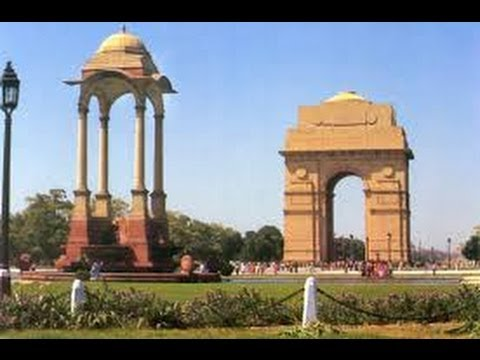

In [ ]:
# Showing downloaded image of a India Gate

Image("images/india gate/Image_8.jpg")

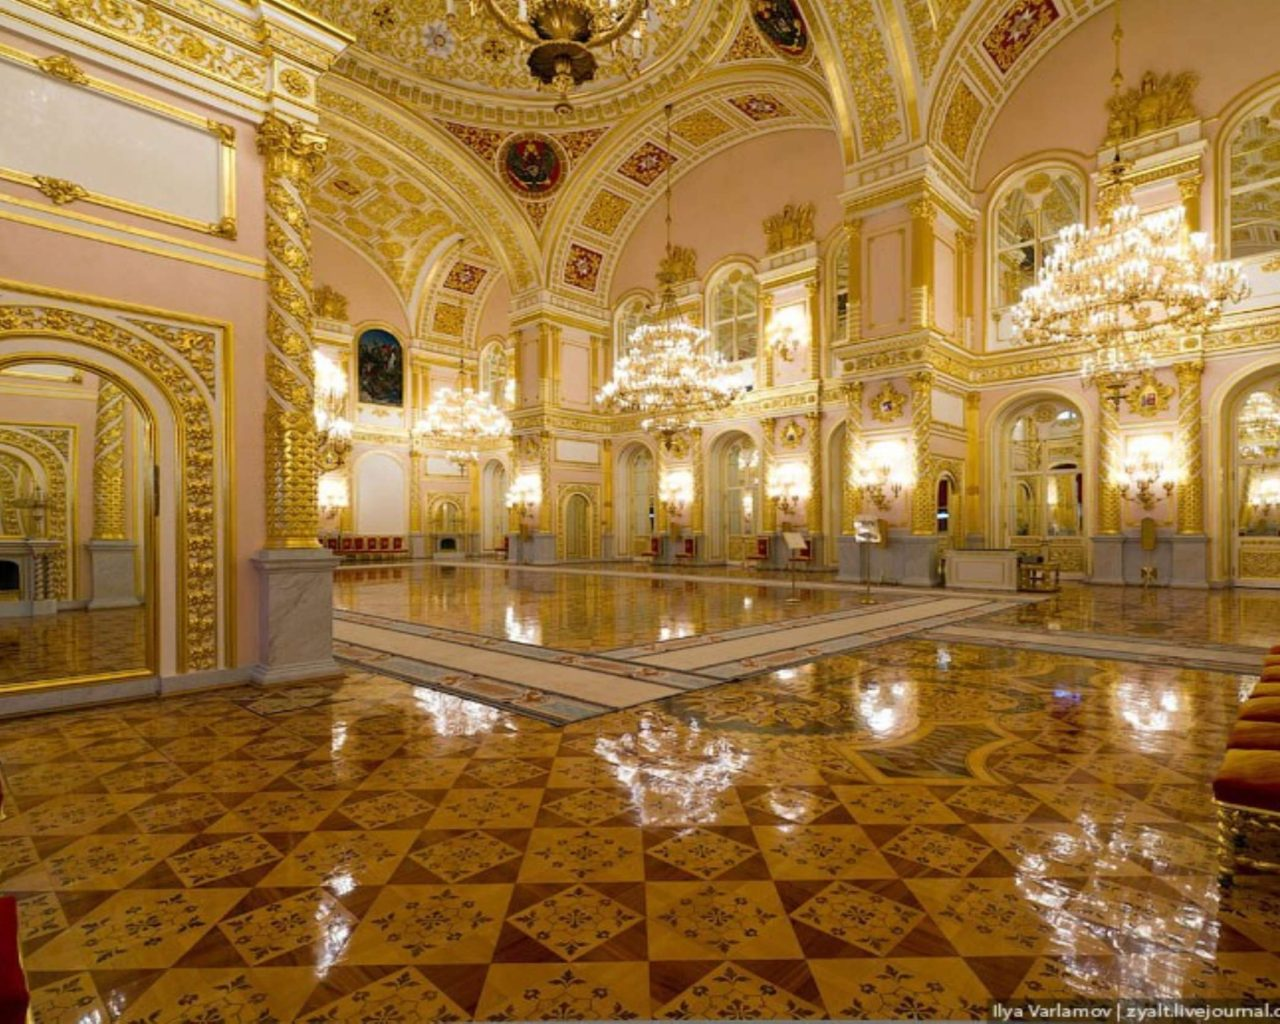

In [ ]:
# Showing downloaded image of Taj Mahal

Image("images/taj mahal/Image_5.jpg")

## Renaming the files in the image folders

In [ ]:
# Reanming the files in Taj Mahal folder
# Starting the name of the files with tajmahal

folder = '/content/images/taj mahal/'
count = 0

for file_name in os.listdir(folder):

    source = folder + file_name

    destination = folder + "tajmahal_" + str(count) + ".jpg"

    os.rename(source, destination)
    count += 1

In [ ]:
# Reanming the files in India Gate folder
# Starting the name of the files with indiagate

folder = '/content/images/india gate/'
count = 0

for file_name in os.listdir(folder):

    source = folder + file_name

    destination = folder + "indiagate_" + str(count) + ".jpg"

    os.rename(source, destination)
    count += 1

## Creating Train, Test and Validation folders

In [ ]:
# Creating train, test and validation folders inside
# image directory using mkdir command

!mkdir images/train
!mkdir images/test
!mkdir images/validation

## Creating India Gate and Taj Mahal inside train, test and validation folders


In [ ]:
# Creating separate folder for India Gate images inside the 
# train, test and validation folders using mkdir command

!mkdir images/train/indiagate
!mkdir images/test/indiagate
!mkdir images/validation/indiagate

In [ ]:
# Creating separate folder for Taj Mahal images inside the 
# train, test and validation folders using mkdir command

!mkdir images/train/tajmahal
!mkdir images/test/tajmahal
!mkdir images/validation/tajmahal

## Copying India Gate images from **"images/india gate"** folder to train, test and validation folders


In [ ]:
# Copying first 100 images from 'india gate' folder of images
# to 'images/train/indiagate' folder

fnames = ['indiagate_{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join('/content/images/india gate', fname)
    dst = os.path.join('/content/images/train/indiagate/', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copying 100-150 images from 'india gate' folder of images
# to 'images/test/indiagate' folder

fnames = ['indiagate_{}.jpg'.format(i) for i in range(100,150)]
for fname in fnames:
    src = os.path.join('/content/images/india gate', fname)
    dst = os.path.join('/content/images/test/indiagate/', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copying 150-200 images from 'india gate' folder of images
# to 'images/validation/indiagate' folder

fnames = ['indiagate_{}.jpg'.format(i) for i in range(150,200)]
for fname in fnames:
    src = os.path.join('/content/images/india gate', fname)
    dst = os.path.join('/content/images/validation/indiagate/', fname)
    shutil.copyfile(src, dst)

## Copying Taj Mahal images from **"images/taj mahal"** folder to train, test and validation folders

In [ ]:
# Copying first 100 images from 'taj mahal' folder of images
# to 'images/train/tajmahal' folder

fnames = ['tajmahal_{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join('/content/images/taj mahal', fname)
    dst = os.path.join('/content/images/train/tajmahal/', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copying 100-150 images from 'taj mahal' folder of images
# to 'images/test/tajmahal' folder

fnames = ['tajmahal_{}.jpg'.format(i) for i in range(100,150)]
for fname in fnames:
    src = os.path.join('/content/images/taj mahal', fname)
    dst = os.path.join('/content/images/test/tajmahal/', fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copying 150-200 images from 'taj mahal' folder of images
# to 'images/validation/tajmahal' folder

fnames = ['tajmahal_{}.jpg'.format(i) for i in range(150,200)]
for fname in fnames:
    src = os.path.join('/content/images/taj mahal', fname)
    dst = os.path.join('/content/images/validation/tajmahal/', fname)
    shutil.copyfile(src, dst)

## Declaring variable path to store the path of the image folder

In [ ]:
# Making a variable named path

path = "/content/images/"

## Making 3 variables to store the paths for train, test and validation folders


In [ ]:
# Making 3 variables to store paths

train_dir = path + "train"
validation_dir = path + "validation"
test_dir = path + "test"

In [ ]:
# Printing the 3 vairables to check

print(train_dir)
print(test_dir)
print(validation_dir)

/content/images/train
/content/images/test
/content/images/validation


## Building the Network

In [ ]:
# Building the model using Sequential

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Printing the model summary

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Using optimizers for compilation
# Using 'binary_crossentropy' as the last layer of our 
# network is Sigmoid

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

## Data Preprocessing

In [ ]:
# Preprocessing and rescaling all the images to 1./255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# Printing shapes of Data Batch and Labels Batch

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


## Fitting the Model

In [ ]:
# Fitting the model

history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/10
20/20 [==============================] - 13s 603ms/step - loss: 0.7186 - acc: 0.5300 - val_loss: 0.7764 - val_acc: 0.5000
Epoch 2/10
20/20 [==============================] - 12s 619ms/step - loss: 0.6806 - acc: 0.6150 - val_loss: 0.7801 - val_acc: 0.5000
Epoch 3/10
20/20 [==============================] - 12s 585ms/step - loss: 0.6878 - acc: 0.5850 - val_loss: 0.6773 - val_acc: 0.5000
Epoch 4/10
20/20 [==============================] - 12s 581ms/step - loss: 0.6470 - acc: 0.6300 - val_loss: 0.6680 - val_acc: 0.6300
Epoch 5/10
20/20 [==============================] - 12s 574ms/step - loss: 0.5646 - acc: 0.7150 - val_loss: 0.5865 - val_acc: 0.6600
Epoch 6/10
20/20 [==============================] - 11s 576ms/step - loss: 0.5506 - acc: 0.7000 - val_loss: 0.5503 - val_acc: 0.6800
Epoch 7/10
20/20 [==============================] - 12s 575ms/step - loss: 0.4459 - acc: 0.7800 - val_loss: 0.5453 - val_acc: 0.6500
Epoch 8/10
20/20 [==============================] - 12s 585ms/step - 

## Learning Curve of the Model

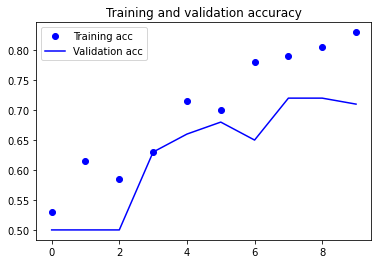

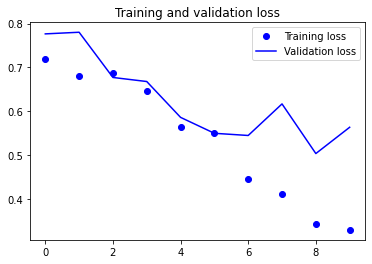

In [ ]:
# Plotting the larning curve of the model

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Evaluating the network

In [ ]:
# Evaluating the network

tmp = model.predict(validation_generator)
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

10/10 [==============================] - 3s 239ms/step
(100, 1)
[[1.4645759e-02]
 [4.8170168e-05]
 [7.1813963e-02]
 [2.7240172e-04]
 [8.1480777e-01]]
(100, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [ ]:
# Displaying the labels for the validation generator

validation_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 100 // 10:
    break

1/1 [==============================] - 0s 97ms/step


In [ ]:
# Printing my_results

my_results

,actual,pred
0,0.0,0.014646
1,1.0,0.983769
2,1.0,0.510493
3,0.0,0.544074
4,0.0,0.291247
...,...,...
5,0.0,0.000055
6,1.0,0.481108
7,0.0,0.588168
8,0.0,0.663571


In [ ]:
# Making a classification report

print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.74      0.64      0.69        50
         1.0       0.68      0.78      0.73        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



In [ ]:
# Making a confusion matrix

print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[32 18]
 [11 39]]


## Key takeaways from the assignment:

1. A lot of time was taken to set up the data and splitting them into different directories. Inititally, I tried to download 400 images of each category but to download the first 400 images it took almost 43 minutes and the next 400 images took even more time with Bing Image Downloader indexing more than 5000 pages.

2. Second point is a small point but it took me a long time to understand why the error was coming. When accessing the path of different directories, I did not put '/' at the beginning of the path, which returned in error.

3. Building the network, I would always prefer to add more layers which would increase the number of trainable parameters and while fitting a model, it would return more accuracy.

4. Another mistake I did was while fitting the model. I gave more number of steps per epoch which gave me an error that my model has ran out of data. 
This is the error I got: "**tensorflow:Your input ran out of data; interrupting training.**"
I tried to take a random value for steps per epoch but then I selected the exact value after calculating it.

5. The validation model has an accuracy of 0.71 which is good as most of the cases are True Positive and True Negative.

6. From the 200 images downloaded for India Gate and Taj Mahal, there were a few images which were not even related to the subjects. I was trying to find a way to get rid of those images and download new images in place of them but I was unable to find a method that would help me in checking with use of a loop on the directory instead of checking manually. There should definetely be a code for it but it seemed complex to do at this time.